In [14]:
import os
import random
import torch.nn as nn
import torch.nn.functional as F

from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, GAE
from torch.utils.data import Dataset
from graph_loader import load_graphs

In [15]:
SEED = 0
random.seed(SEED)

In [ ]:
"""

    graph.get_edges()

    Edge:
        node: Aktuelle Node
        connected_nodes: List an Nodes, von node

        E.g.: edges.get_items() liefer alle edges:
        node: Node
        connected_nodes: [Dict(Nodes)]
        Verbindung Node 2 zu Node 0:
            Node(NodeID=2, Part=Part(PartID=58, FamilyID=31))
            [Node(NodeID=0, Part=Part(PartID=1621, FamilyID=0))]

        Verbindung Node 0 zu Nodes 1, 2, 3, 4, 5:
            Node(NodeID=0, Part=Part(PartID=1621, FamilyID=0)),
            [Node(NodeID=1, Part=Part(PartID=58, FamilyID=31)), Node(NodeID=2, Part=Part(PartID=58, FamilyID=31)), Node(NodeID=3, Part=Part(PartID=58, FamilyID=31)), Node(NodeID=4, Part=Part(PartID=58, FamilyID=31))]




"""

In [75]:
def create_edge_list(edges):
    edge_set = set()
    for node, connected_nodes in edges.items():
        for connected_node in connected_nodes:

            # Store edges by node_ID and part_ID + node_ID and part_ID or source and target
            # Make sure each edge is only stored once (unidirectionally)
            edge = tuple(sorted((
                (node.get_id(), node.get_part().get_part_id()),
                (connected_node.get_id(), connected_node.get_part().get_part_id())
            )))
            edge_set.add(edge)

    return list(edge_set)


In [66]:
class GraphDataset(Dataset):
    def __init__(self, file_path: str, train=False, validation=False, test=False, seed=42):
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"Dataset file not found at {file_path}")

        self.graphs = load_graphs(file_path)

        if sum([train, validation, test]) != 1:
            raise ValueError("Exactly one of 'train', 'validation', or 'test' must be True.")

        for index, graph in enumerate(self.graphs):
            if(index == 0):
                edge_list = create_edge_list(graph.get_edges())
                for edge in edge_list:
                    print(edge)
                graph.draw()

((0, '1621'), (4, '58'))
((0, '1621'), (3, '58'))
((0, '1621'), (2, '58'))
((0, '1621'), (1, '58'))


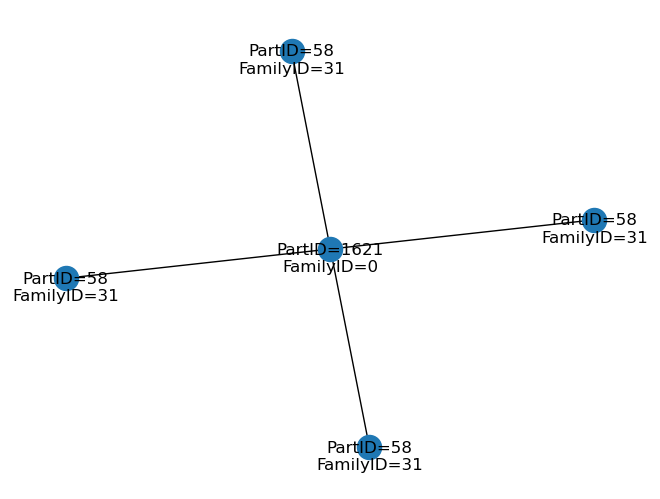

In [74]:
training_set = GraphDataset("data/graphs.dat", train = True, seed=SEED)
#validation_set = GraphDataset("data/graphs.dat", validation = True, seed=SEED)
#testing_set = GraphDataset("data/graphs.dat", test = True, seed=SEED)